In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Data Preprocessing
file_path = 'Tip_Dataset.csv'
df = pd.read_csv(file_path)

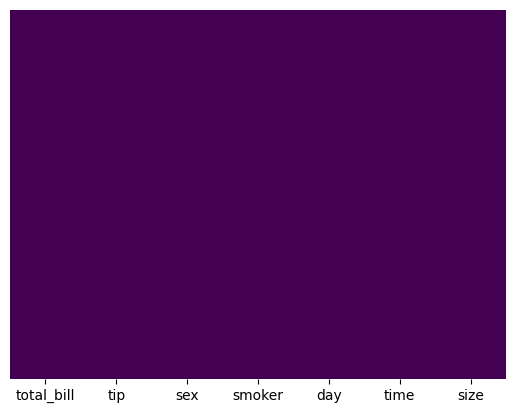

In [23]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

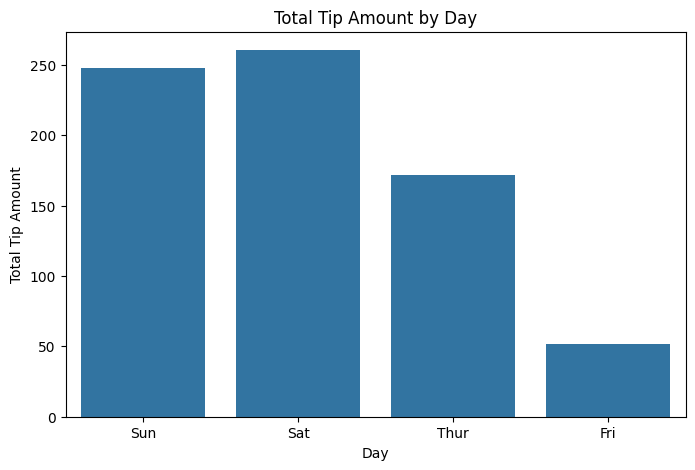

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='tip', data=df, estimator=sum, errorbar=None)
plt.title('Total Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Total Tip Amount')
plt.show()

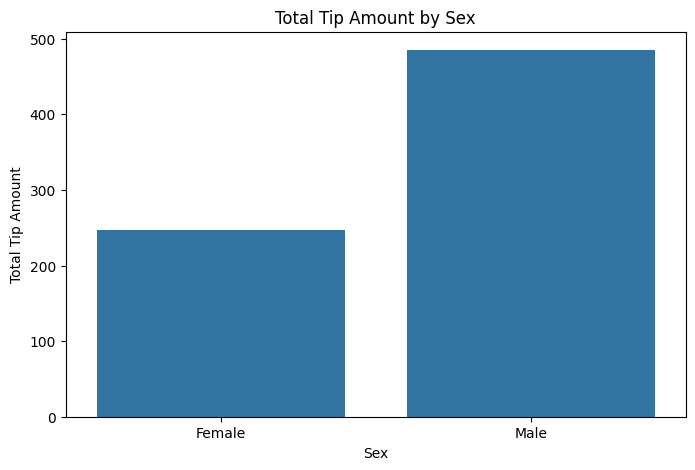

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='tip', data=df, estimator=sum, errorbar=None)
plt.title('Total Tip Amount by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Tip Amount')
plt.show()

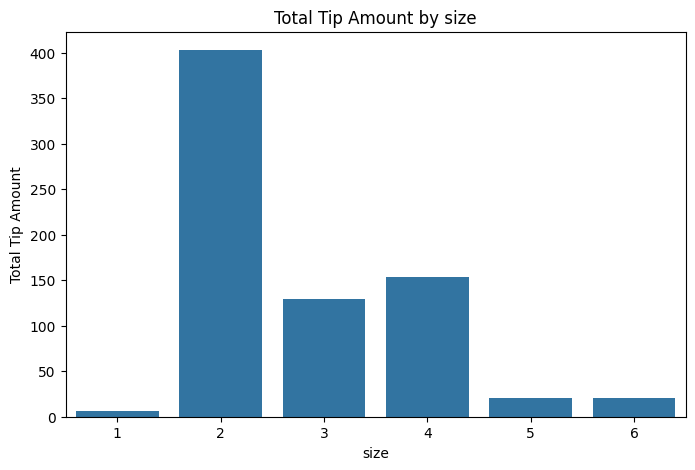

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x='size', y='tip', data=df, estimator=sum, errorbar=None)
plt.title('Total Tip Amount by size')
plt.xlabel('size')
plt.ylabel('Total Tip Amount')
plt.show()

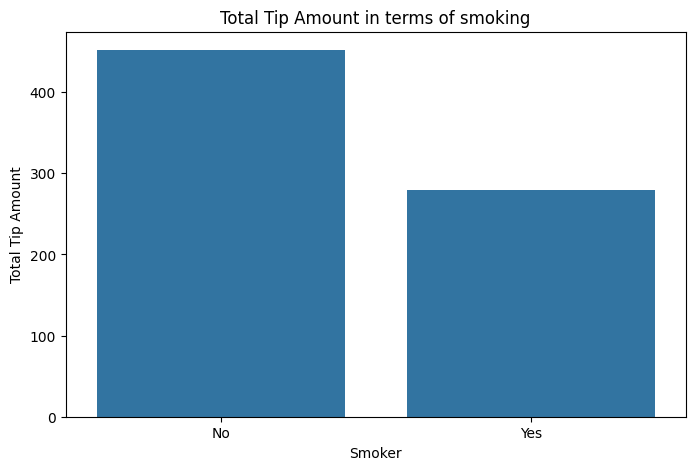

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='tip', data=df, estimator=sum , errorbar=None)
plt.title('Total Tip Amount in terms of smoking')
plt.xlabel('Smoker')
plt.ylabel('Total Tip Amount')
plt.show()

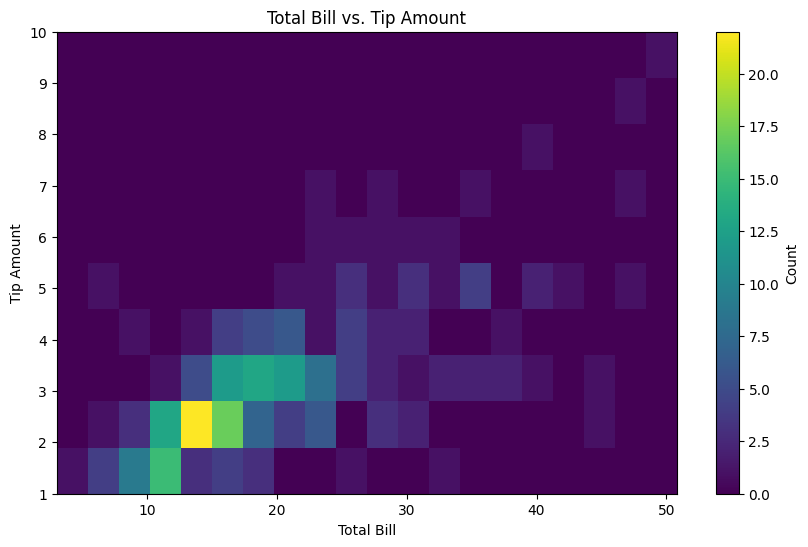

In [28]:
plt.figure(figsize=(10, 6))
plt.hist2d(df['total_bill'], df['tip'], bins=[20, 10], cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Total Bill vs. Tip Amount')
plt.show()

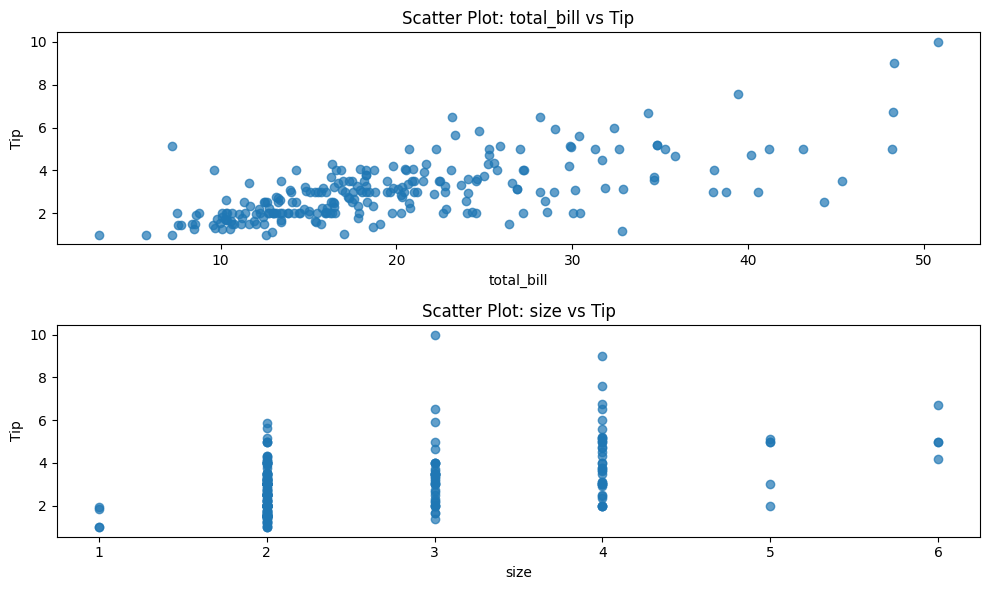

In [29]:
plt.figure(figsize=(10, 6))
features = ["total_bill", "size",]
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.scatter(df[feature], df["tip"], alpha=0.7)
    plt.title(f"Scatter Plot: {feature} vs Tip")
    plt.xlabel(feature)
    plt.ylabel("Tip")
plt.tight_layout()
plt.show()

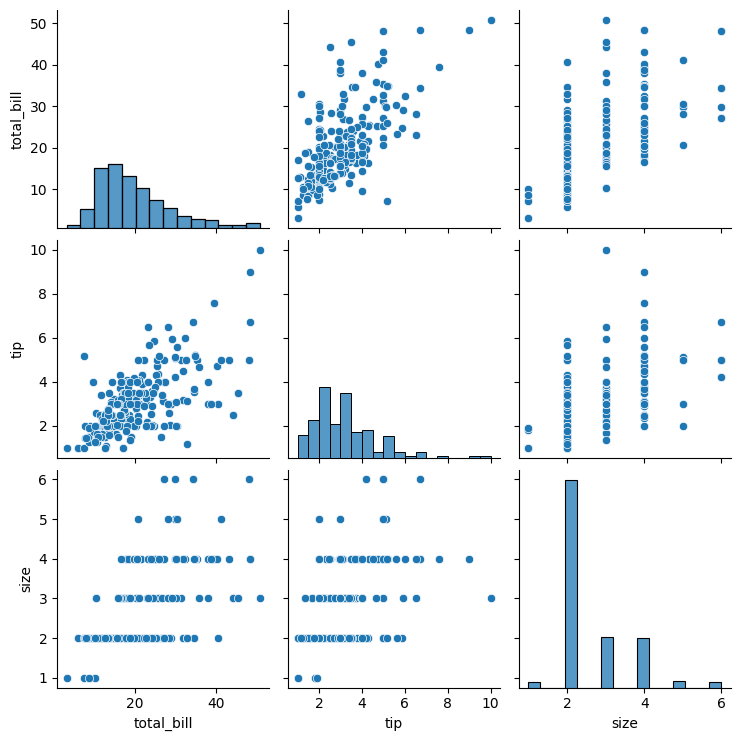

In [30]:
sns.pairplot(df)
plt.show()

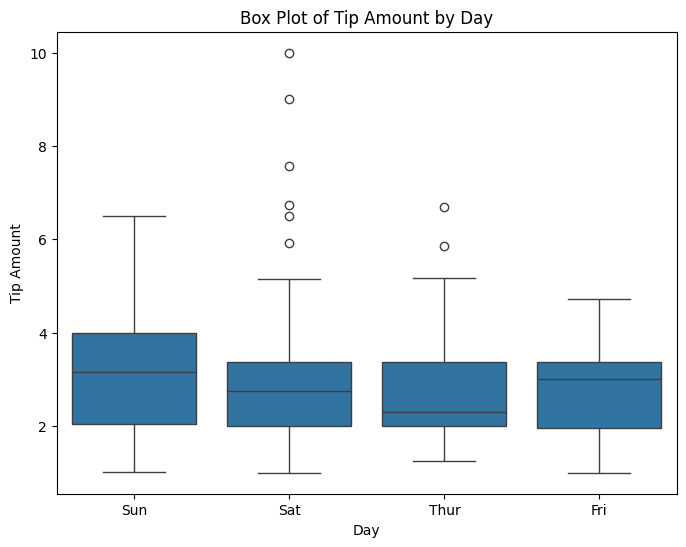

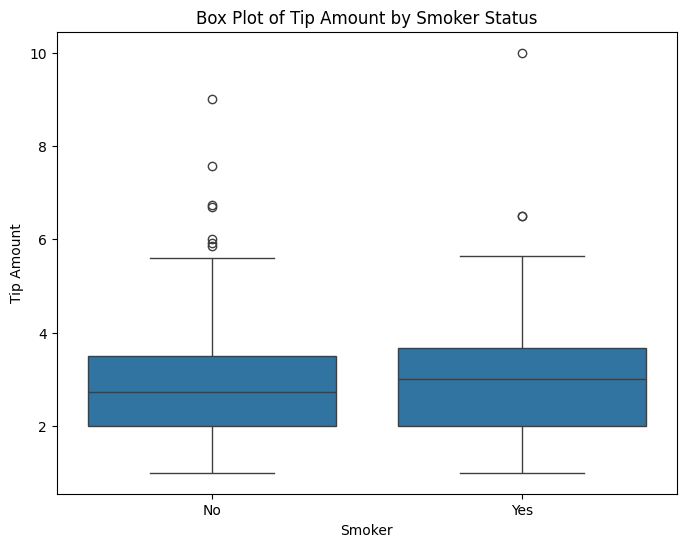

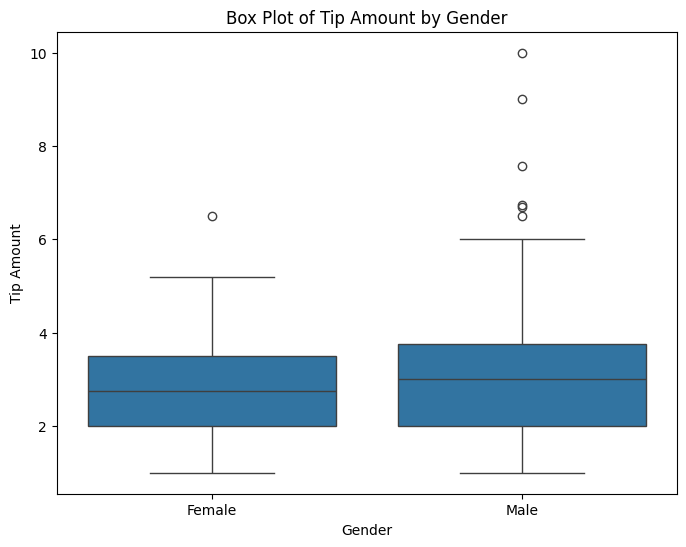

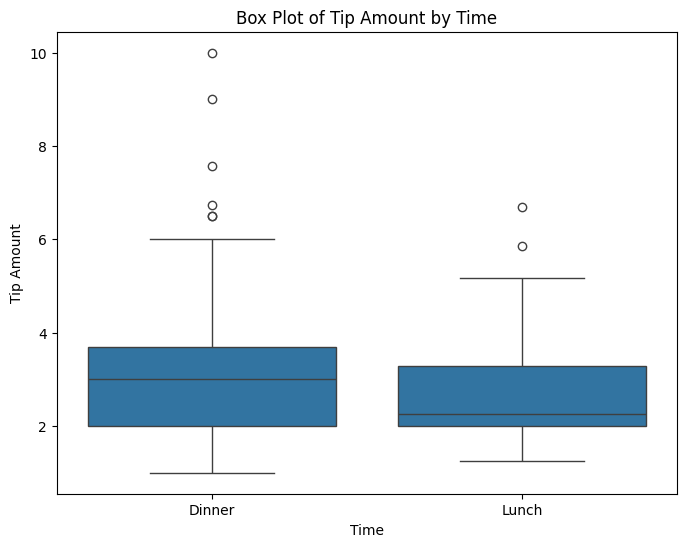

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()

# Box Plot for 'smoker' status vs 'tip' to see tip distribution for smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.show()

# Box Plot for 'sex' vs 'tip' to see tip distribution for each gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip Amount')
plt.show()

# Box Plot for 'time' vs 'tip' to see tip distribution for each gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='time', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Time')
plt.xlabel('Time')
plt.ylabel('Tip Amount')
plt.show()

In [32]:

new_df = df.copy()
categorical_columns = ["sex", "smoker", "day", "time"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le
print(new_df.head())
for col, le in label_encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    2     0     2
1       10.34  1.66    1       0    2     0     3
2       21.01  3.50    1       0    2     0     3
3       23.68  3.31    1       0    2     0     2
4       24.59  3.61    0       0    2     0     4
sex: {'Female': 0, 'Male': 1}
smoker: {'No': 0, 'Yes': 1}
day: {'Fri': 0, 'Sat': 1, 'Sun': 2, 'Thur': 3}
time: {'Dinner': 0, 'Lunch': 1}


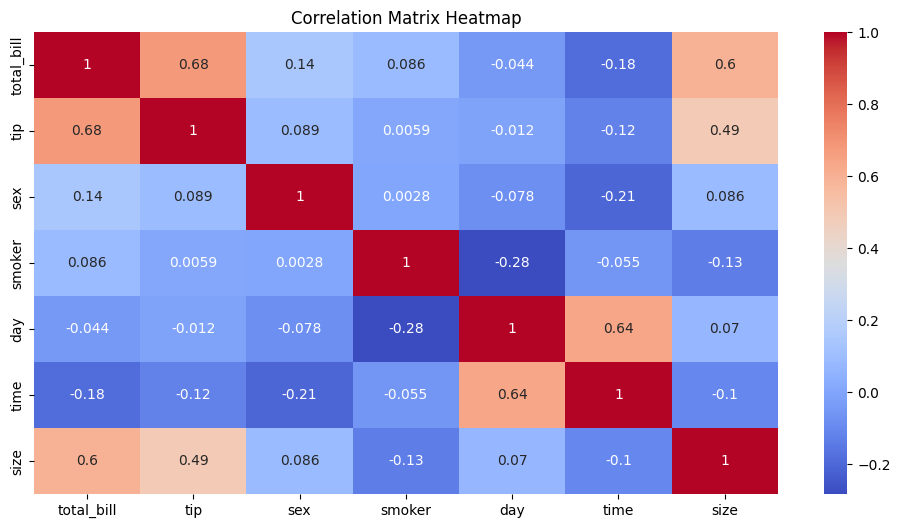

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
scaler = StandardScaler()

X = new_df.drop(columns=['tip'])
y= new_df.tip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [35]:
X_const = sm.add_constant(X)  # Add constant for intercept
rainbow_stat, rainbow_p_val = sm.stats.diagnostic.linear_rainbow(sm.OLS(y, X_const).fit())
print("Rainbow Test p-value:", rainbow_p_val)

Rainbow Test p-value: 0.15798464222013184


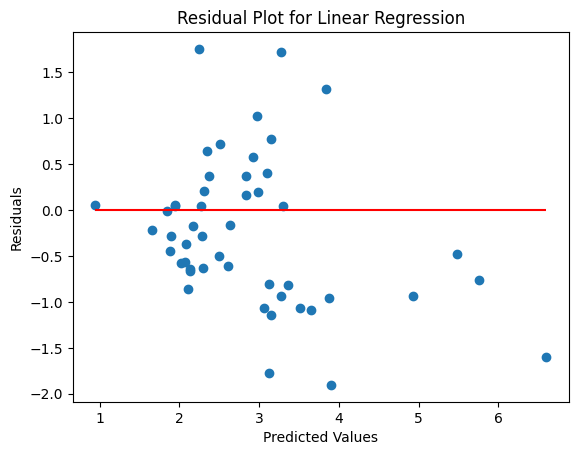

Linear Regression - MSE: 0.69, R2 Score: 0.44


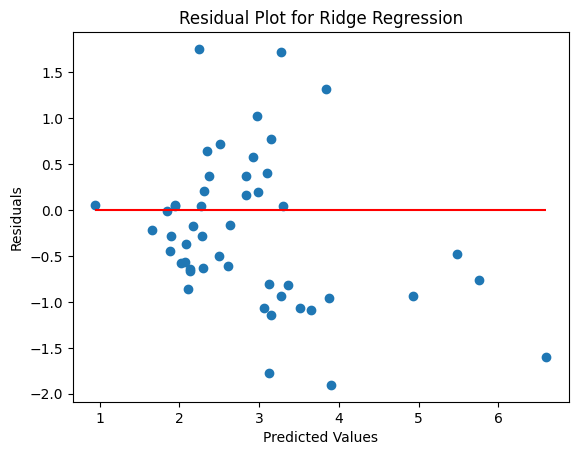

Ridge Regression - MSE: 0.69, R2 Score: 0.44


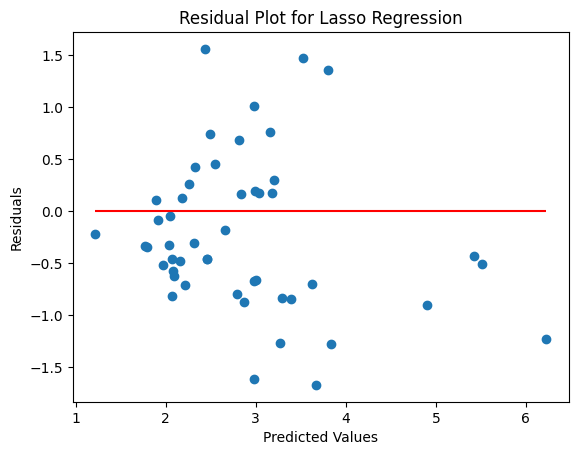

Lasso Regression - MSE: 0.59, R2 Score: 0.53


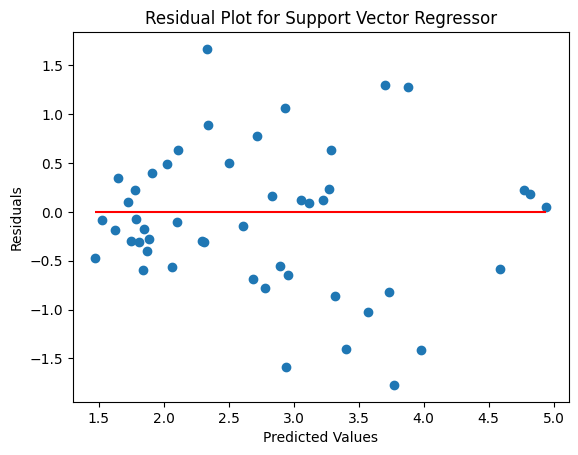

Support Vector Regressor - MSE: 0.54, R2 Score: 0.57


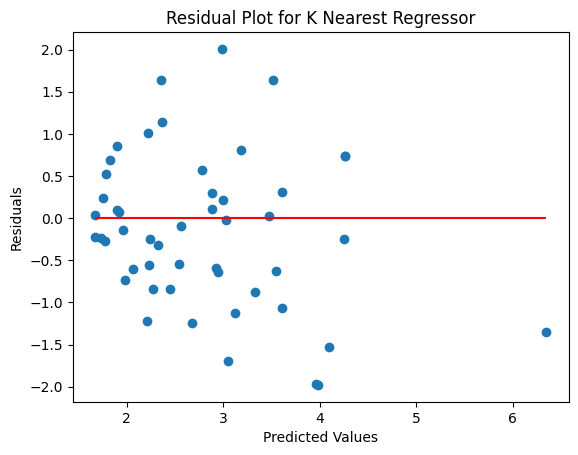

K Nearest Regressor - MSE: 0.84, R2 Score: 0.33


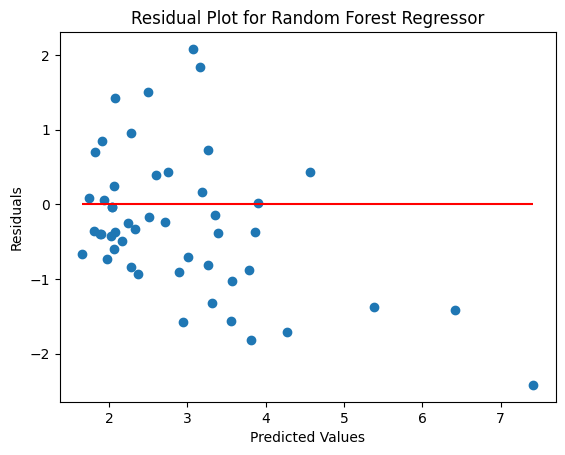

Random Forest Regressor - MSE: 0.94, R2 Score: 0.25


In [36]:
models =  {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 0.1),
    'Lasso Regression': Lasso(alpha = 0.1),
    'Support Vector Regressor': SVR(),
    'K Nearest Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    residuals = y_test - predictions  # Corrected to use y_test
    plt.scatter(predictions, residuals)
    plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
    plt.title(f'Residual Plot for {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Suggestions for the business for more tips:

-**Attract more weekday customers**: Offer special deals or discounts on weekdays to bring in more customers, which could lead to higher tips.

-**Focus on personalized service**: Make customers feel valued by tailoring the service to their preferences. Happy customers are likely to tip more.

-**Special attention for female customers**: Treating female customers with a little extra care might encourage them to leave bigger tips.

-**Promote lunch-hour offers**: Discounts or deals during lunchtime, combined with quick and efficient service, can lead to better tipping.

-**Cater to larger groups**: Bigger groups tend to spend more, and social dynamics can encourage higher tips. Offer special packages or prioritize their needs.